![image.png](attachment:ab28a6cb-54f5-4f03-861e-749712181d99.png)

Luz Mary Pinzón S. luzmary.pinzon@upf.edu



## Aplicación en finanzas: Precios y  simple returns

En esta sesion trabajaremos los conceptos básicos de los returns: calcular returns y returns compuestos.


https://bookdown.org/compfinezbook/introcompfinr/AssetReturnCalculations.html#simple-returns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import kit

# Leyendo archivos CSV

In [3]:
df  = pd.read_csv('C:/Users/Lenovo/Programacion/Python/BBDD/sample_prices_manual.csv', sep=";")
df

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


<Axes: >

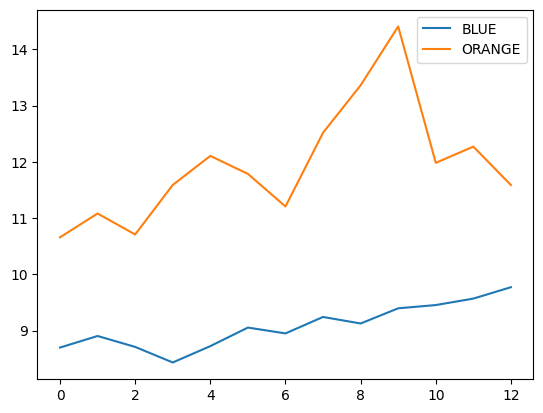

In [16]:
df.plot()

"DPI" es la abreviatura de "Puntos por pulgada". Este valor se refiere al número de puntos que se imprimen por pulgada. Por lo tanto, no hace falta decir que cuanto mayor sea el valor de DPI, mayor será la densidad de puntos impresos, mayor será la resolución ("menos pixelados"). Dependiendo de lo que se imprima, este conocimiento puede ser muy útil. Todas las imágenes, incluidos los logotipos en tu diseño deben satisfacer un umbral mínimo de DPI para que la impresión final sea majestuosa. Sólo porque estos diseños puedan verse increíbles en tu ordenador no significa que este sea el caso una vez impreso."""

Si queremos guardar y exportar la grafica escribimos el siguiente codigo

In [17]:
plt.savefig("Precios.png", dpi = 300)

<Figure size 640x480 with 0 Axes>

### Vamos a calcular los retornos con la funcion pct_change()

Esta funcion calcula el valor R para cada linea:

$$R=\frac{P_{t+1}-P_t}{P_t}$$

El retorno de una día es la division entre el precio actual menos al precio anterior (día), dividido el precio anterior
En el caso del DF que tenemos seria el siguiente:

In [4]:
df

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [5]:
# El retorno del dia 1  del Stock Blue es el siguiente:
(8.9055-8.7000)/8.7000

0.023620689655172493

In [6]:
# El retorno del dia 2  del Stock Blue es el siguiente:
(8.7113-8.9055)/8.9055

-0.02180674863848188

Una manera más rapida de hacer este producto para todo un DF es con el statement " pct_change()", este statement nos genera el retorno de cada día

In [7]:
retorno = df.pct_change()
retorno

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


Como podemos ver en nuestro DF tenemos valor NAN, los cuales podemos eliminarlos con el statement "dropna" 

Más informacion sobre el método dropna [Aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [8]:
retorno.dropna()

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [8]:
# Agregamos "dropna" para eliminar los valores NAN y en este caso, agregamos "inplace=True"
retorno.dropna(inplace=True)

In [10]:
retorno.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

Para medir la volatilidad entre dos activos, podemos determinar la desviación estandar (STD).

Lo que significa que entre mayor sea la STD mayor el la volatilidad del activo

In [13]:
retorno.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

<Axes: >

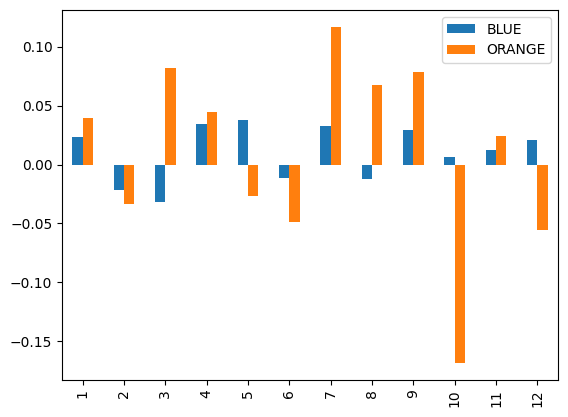

In [33]:
retorno.plot(kind='bar')

### retorno acumulados=(cumulative return)

Para calcular el rendimiento acumulado, rendimiento acumulado (cumulative return) de los retornos de una acción, existen varias formas dependiendo de cómo se estructuren los retornos (diarios, mensuales, etc.) y de la metodología que desees aplicar. 

#### 1.Multiplicación de retornos (Método de crecimiento)

$$R_{acumulado}=\left({\LARGE \Pi}_1^n(1+R_i)\right)-1$$

In [9]:
retorno_acumulado = (1+ retorno).product()-1
retorno_acumulado

BLUE      0.123310
ORANGE    0.087167
dtype: float64

### Retorno acumulado desde el tiempo T0 hasta el tiempo T2

$$R_{to,t2}=(1+R_{to,t1})*(1+R_{t1,t2})-1$$


### Cuál es el rendimiento promedio diario 

rpd=$\sqrt[n]{{\LARGE \Pi }_{m=1}^{n}(1+R_{i})}-1$



- En nuestro caso tenemos n=12 dias, se puede verificar con `returns_d.shape[0]`


rpd=$\sqrt[12]{{\LARGE \Pi }_{m=1}^{12}(1+R_{i})}-1$

In [58]:
# Rendimiento diario
retorno_diario = (((1 + retorno).product())**(1/12)-1)
retorno_diario  

BLUE      0.009737
ORANGE    0.006989
dtype: float64

La fomrula la podemos relaizar de dos maneras, podemos sacarlo con el retorno  (Rentavilidad diaria) donde debemos de expresar con el statement ".product()", el cual nos dara el retorno acumulado de los días que estamos revisando.

Por otro lado podemos solo expresarla con el retorno acumulado, pero deberemos de agregar el valor 1 para que la expresion se pueda ejecutar

In [59]:
rendimiento_diario = ((1 + retorno_acumulado)**(1/12))-1
rendimiento_diario

BLUE      0.009737
ORANGE    0.006989
dtype: float64

- Si solo queremos averiguar la retorno  (rentabilidad) en dias especificos, en este caso 2 días, solo debemos hacer el producto del retorno diario (Redimiento diario)

In [60]:
(1 + retorno_diario)* (1 + retorno_diario) - 1

BLUE      0.019569
ORANGE    0.014027
dtype: float64

In [61]:
## En dos dias la rentabilidad promedio en dos dias:
(1 + rendimiento_diario)*(1 + rendimiento_diario)-1

BLUE      0.019569
ORANGE    0.014027
dtype: float64

O podemos expresarlo como el retorno diario elevado a la n, donde " n= al numero de días que queremos saber"

In [63]:
(1+retorno_diario)**2-1

BLUE      0.019569
ORANGE    0.014027
dtype: float64

### Cuál es el rendimiento  promedio  mensual-rendimiento mensual?
$rpm=(1+{rpd})^{22}-1$


In [64]:
# Rendimiento promedio mensual:
retorno_promedio_mensual = (1 + retorno_diario)**22-1
retorno_promedio_mensual

BLUE      0.237607
ORANGE    0.165583
dtype: float64

### Cuál es el rendimiento anual promedio?

In [65]:
# Rebtabiliada anual promedio
retorno_promedio_anual = (1 + retorno_diario)**252-1
retorno_promedio_anual

BLUE      10.494628
ORANGE     4.783907
dtype: float64

### Resumen Toy example

## Anualizando Rendimientos
Para anualizar un retorno o rendimientos durante un período, se capitaliza el retorno o rendimiento tantas veces como períodos haya en un año. Por ejemplo, para anualizar un rendimiento mensual, multiplica  ese rendimiento 12 veces. 

La fórmula para anualizar un rendimiento mensual $ R_m $ es:

$$ (1 + R_m) ^ {12} - 1 $$

Para anualizar un rendimiento trimestral $ R_q $ obtendría:

$$ (1 + R_q) ^ {4} - 1 $$

Y finalmente, para anualizar un rendimiento diario de $ R_d $ obtendría:

$$ (1 + R_d) ^ {252} - 1 $$

Por ejemplo, para anualizar un 1.2% mensual, haría:

In [71]:
rpm = 0.012
r = (1+rpm)**12-1
r

0.15389462418258604

Por ejemplo,  un 4% trimestral, haría:

In [67]:
rq = 0.04
r = (1+rpm)**4-1
r

0.04887093273599996

 y un rendimiento diario de 0.01%,

In [68]:
rpm = 0.0001
r = (1+rpm)**252-1
r

0.025518911987694626

- Ejercicio 1:
Dado el DataFrame con los retornos  diarios, Construya la función anualizar (anual_ret_d),  anualice los rendimientos 

In [1]:
def anual_ret_d (x):

    retorno = x.pct_change()
    retorno.dropna(inplace=True)
    retorno_acumulado = (1+ retorno).product()-1
    retorno_promedio_diario = (1 + retorno_acumulado)**(1/len(retorno))-1
    retorno_promedio_anual = (1 + retorno_promedio_diario)**252-1
    
    print(retorno_promedio_anual)

- Ejercicio 2:
Dado el DataFrame con los retornos  mensuales, Construya la función anualizar (anual_ret_m),  los anualice

In [ ]:
def anual_ret_m (x):

    retorno = x.pct_change()
    retorno.dropna(inplace=True)
    retorno_acumulado = (1+ retorno).product()-1
    retorno_promedio_diario = (1 + retorno_acumulado)**(1/len(retorno))-1
    retorno_mensual = (1 + retorno_promedio_diario)**12-1
    
    print(retorno_mensual)

- Ejercicio 3:
Dado el DataFrame con los retornos trimestrales, Construya la función anualizar (anual_ret_t),  los anualice 

In [28]:
def anual_ret_t (x):

    retorno = x.pct_change()
    retorno.dropna(inplace=True)
    retorno_acumulado = (1+ retorno).product()-1
    retorno_trimestral = ((1 + retorno_acumulado)**4)-1
    
    print(retorno_trimestral)


0.4115816100000005

- Ejercicio 4:
Dado el DataFrame con los retornos , Construya la función anualizar (anual_ret),  que calcule los retornos promedios en la unidad dada  y luego  anualice los retornos independientemente de la unidad dada(dias, meses, trimestres)

In [2]:
import kit
df2  = pd.read_csv('C:/Users/Lenovo/Programacion/Python/BBDD/sample_prices_manual.csv', sep=";")
df2


,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [3]:
kit.anual_ret_d(df2)

BLUE      10.494628
ORANGE     4.783907
dtype: float64


- Ejemplo 2: El rendimiento anual es del 9%

- cuál es el rendimiento diario?

- cuál es el rendimiento mensual?

In [7]:
#Ejerciocio del PDF
r = 0.0022
rpm = ((1+ r)**22)-1
rpm

0.049534610643923394

In [6]:
ra = (1 + r)**252-1
ra


0.7398363428312058

- Por ejemplo: El rendimiento anual es del 9% 

- cuál es el rendimiento diario?

- cuál es el rendimiento mensual?

In [19]:
r = 0.09
rm = ((1+r)**(1/12))-1
rm_2 = rm *100
rm_2

0.7207323316136716

In [15]:
rd = (1 + r)**(1/252)-1
rd_2 = rd *100
rd_2

0.034203346519490196

Por ejemplo: El retorno diario es del 0.001%

- cuál es el rendimiento mensual?

- cuál es el rendimiento anual?

In [20]:
r_d = 0.001
r_m = (1+r_d)**22-1
r_m

0.022232547341406228

In [17]:
r_a = (1+ r_d)**252 -1
r_a

0.28643404437615216

Con los datos de NFLX
1 Hacer una graca de los precios
2 Calcular los rendimientos diarios (asumimos que los registros
son diarios)
3 Calcular la media de los rendimientos. Que signica este
valor?
4 Calcular la std de los rendimientos. Que signica este valor?
5 Hacer un gráco de barras de los rendimientos
6 Calcular los rendimientos acumulados
7 Calcular el rendimiento prom diario. Que signica este valor?
8 Calcular el rendimiento prom mensual. Con la función del kit
9 Calcular el rendimiento prom anual. Con la función del kit

In [3]:
df_3  = pd.read_csv('C:/Users/Lenovo/Programacion/Python/BBDD/sample_prices_manual.csv', sep=";")
df_3

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [6]:
kit.desvast(df_3, tiempo="anual")

La volatilidad anual es: BLUE      0.380630
ORANGE    1.263631
dtype: float64
